In [3]:
import pandas as pd

# Load the Titanic dataset
titanic_data = pd.read_csv('titanic.csv')

# Display the first few rows of the dataset
titanic_data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Drop rows with missing target values
titanic_data = titanic_data.dropna(subset=['Survived'])

# Fill missing values for 'Age' with the median value
titanic_data['Age'] = titanic_data['Age'].fillna(titanic_data['Age'].median())

# Fill missing values for 'Embarked' with the mode value
titanic_data['Embarked'] = titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0])

# Convert categorical variables to numerical
label_encoder = LabelEncoder()
titanic_data['Sex'] = label_encoder.fit_transform(titanic_data['Sex'])
titanic_data['Embarked'] = label_encoder.fit_transform(titanic_data['Embarked'])

# Select features and target
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
X = titanic_data[features]
y = titanic_data['Survived']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score, f1_score, roc_curve, auc
import matplotlib.pyplot as plt

# Initialize logistic regression model
log_reg = LogisticRegression(max_iter=1000)

# Evaluate using k-fold cross-validation
cv_scores = cross_val_score(log_reg, X, y, cv=5)
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean Cross-Validation Score: {cv_scores.mean()}")

# Train and evaluate using single train-test split
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f"Precision: {precision}, Recall: {recall}, F1-Score: {f1}")


Cross-Validation Scores: [0.7877095  0.78651685 0.78089888 0.76966292 0.82022472]
Mean Cross-Validation Score: 0.7890025735986442
Precision: 0.7857142857142857, Recall: 0.7432432432432432, F1-Score: 0.7638888888888888


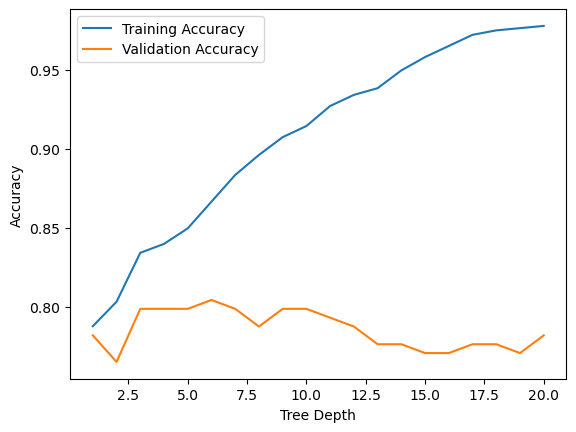

In [8]:
from sklearn.tree import DecisionTreeClassifier
import numpy as np

# Train decision tree classifier with varying depths
train_accuracies = []
test_accuracies = []

for depth in range(1, 21):
    tree = DecisionTreeClassifier(max_depth=depth, random_state=42)
    tree.fit(X_train, y_train)
    train_accuracies.append(tree.score(X_train, y_train))
    test_accuracies.append(tree.score(X_test, y_test))

# Plot training and validation accuracies
plt.plot(range(1, 21), train_accuracies, label='Training Accuracy')
plt.plot(range(1, 21), test_accuracies, label='Validation Accuracy')
plt.xlabel('Tree Depth')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


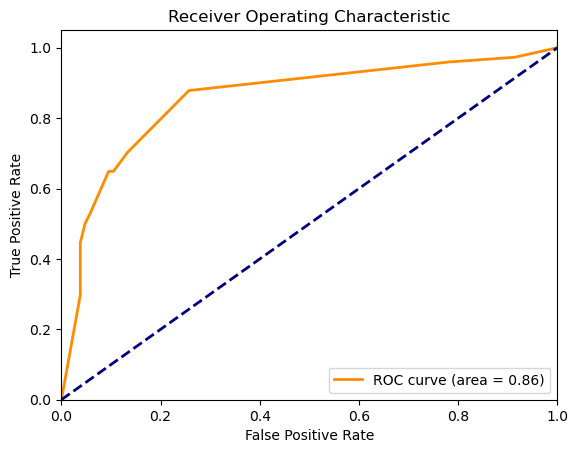

AUC: 0.8555341055341056


In [9]:
# Train decision tree classifier
tree = DecisionTreeClassifier(max_depth=5, random_state=42)
tree.fit(X_train, y_train)
y_proba = tree.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

print(f"AUC: {roc_auc}")


In [11]:
# Logistic Regression without cross-validation
log_reg.fit(X_train, y_train)
train_score_log_reg = log_reg.score(X_train, y_train)
test_score_log_reg = log_reg.score(X_test, y_test)
print(f"Logistic Regression - Train Score: {train_score_log_reg}, Test Score: {test_score_log_reg}")

# Decision Tree without cross-validation
tree_no_cv = DecisionTreeClassifier(max_depth=5, random_state=42)
tree_no_cv.fit(X_train, y_train)
train_score_tree = tree_no_cv.score(X_train, y_train)
test_score_tree = tree_no_cv.score(X_test, y_test)
print(f"Decision Tree - Train Score: {train_score_tree}, Test Score: {test_score_tree}")

# Logistic Regression with cross-validation (already done in Step 3)
print(f"Logistic Regression with CV Mean Score: {cv_scores.mean()}")

# Decision Tree with cross-validation
tree_cv_scores = cross_val_score(tree, X, y, cv=5)
print(f"Decision Tree with CV Scores: {tree_cv_scores}")
print(f"Mean Decision Tree with CV Score: {tree_cv_scores.mean()}")


Logistic Regression - Train Score: 0.800561797752809, Test Score: 0.8100558659217877
Decision Tree - Train Score: 0.8497191011235955, Test Score: 0.7988826815642458
Logistic Regression with CV Mean Score: 0.7890025735986442
Decision Tree with CV Scores: [0.80446927 0.81460674 0.82022472 0.76404494 0.85393258]
Mean Decision Tree with CV Score: 0.8114556525014123
